In [39]:
import pandas as pd

housing_data = pd.read_csv('melb_data.csv')
housing_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [40]:
housing_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


# Scatter plot


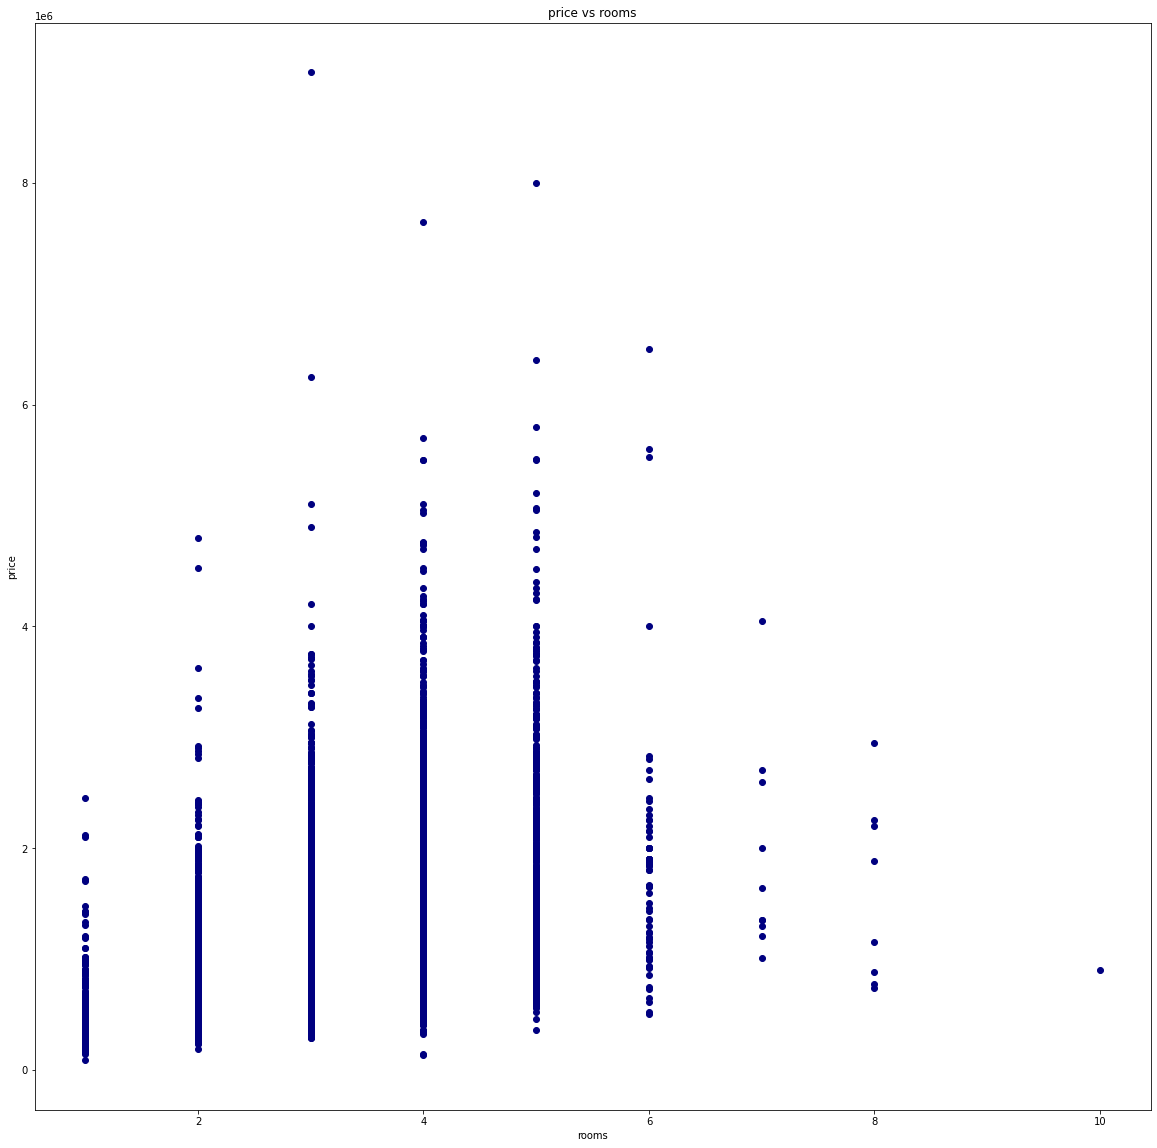

In [41]:

Rooms = housing_data['Rooms']
Pricing = housing_data['Price']

data = housing_data[['Price','Rooms']]

import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
plt.ylabel('price')
plt.xlabel('rooms')
plt.title('price vs rooms')
plt.scatter(Rooms, Pricing, color = 'navy')

Regression


In [42]:
import numpy as np
import statsmodels.api as sm


In [44]:
#median_income = rooms
#median_housing value = price
#median_data = data

x_ary = housing_data['Rooms']
x_with_cnst = sm.add_constant(x_ary)
model = sm.OLS(housing_data['Price'], x_with_cnst)
results = model.fit()
b,m = results.params
print(m)
print(b)

332203.94464777457
99669.86858934835


In [47]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     4445.
Date:                Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:50:15   Log-Likelihood:            -1.9889e+05
No. Observations:               13580   AIC:                         3.978e+05
Df Residuals:                   13578   BIC:                         3.978e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.967e+04   1.54e+04      6.475      0.0

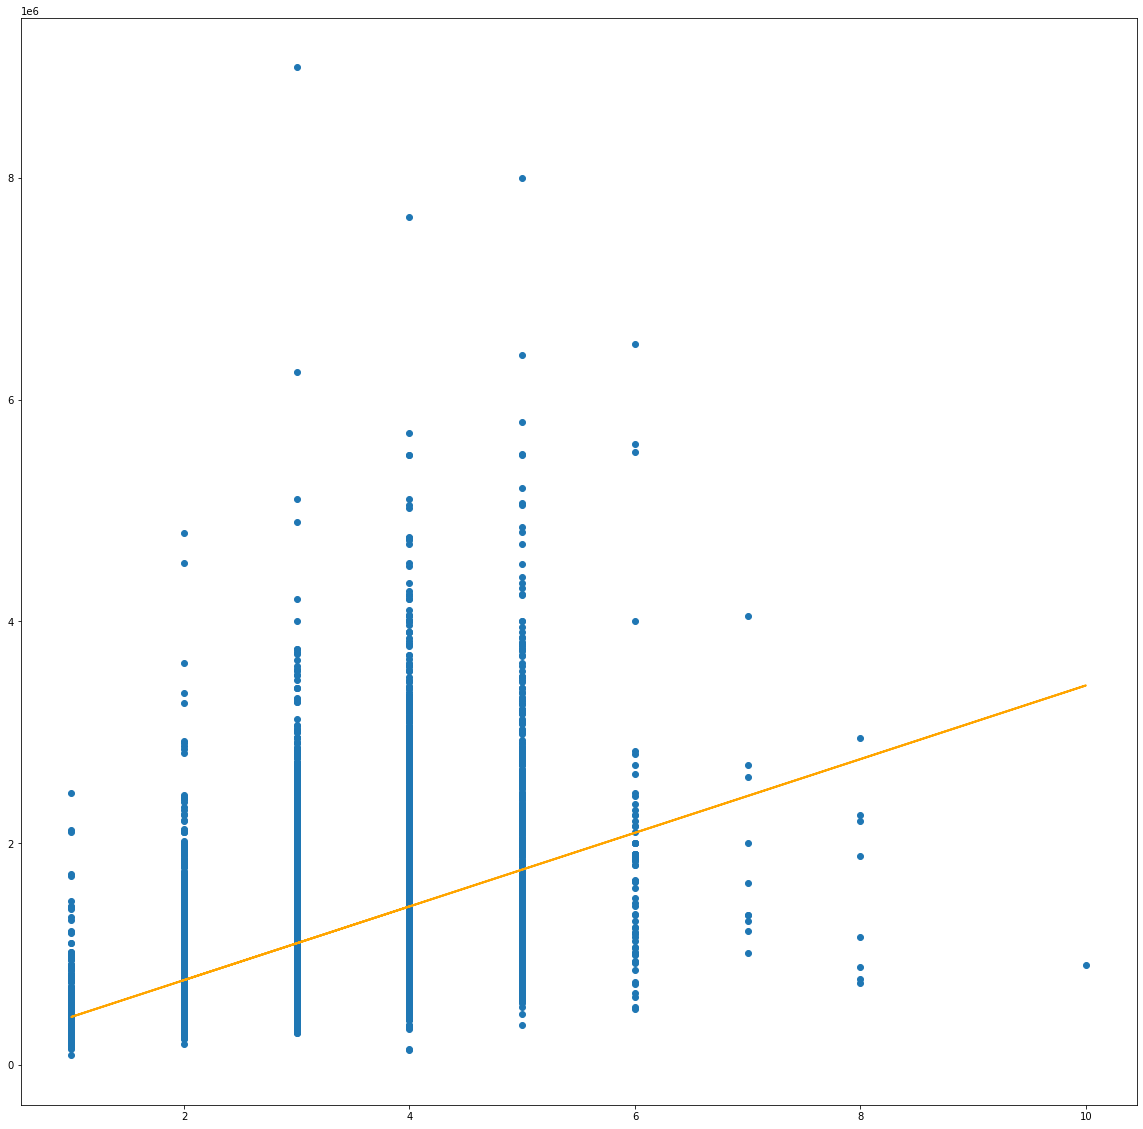

In [46]:
plt.figure(figsize = (20,20))
plt.scatter(housing_data['Rooms'], housing_data['Price'])
plt.plot(x_ary, m*x_ary+b, color = 'orange', linewidth = '2')